# Question: Is it better to buy fresh or frozen fruit/vegetables?
**Short answer:** Fresh.<br>
There is no solid evidence that buying frozen fruit/vegetables benefits the environment, but it's a proven fact that fresh fruit/vegetables are better for health. Consider meal planning, so that fruit/vegetables you bought don't get spoiled. If you already have something in your home that you're not sure you'll eat in time (bought fresh), consider freezing it while it's still edible or giving it away.<br>

**Extended answer:** What you do with the food you buy really matters. The majority of organic waste comes not from manufacturing facilities or food service, but from customers! In 2016 it was estimated that 92 kg of fruit/vegetables (per person per year) is thrown away by consumers.<br>

**Source:** https://www.sciencedirect.com/science/article/pii/S0956053X18301946#b0090

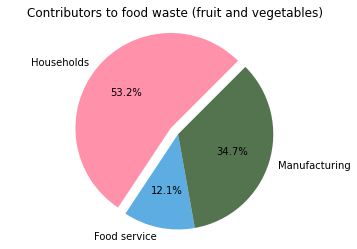

In [1]:
# Waste in kilograms per person per year
# 92 kg - households, 21 kg - food service, 60 - manufacturing, 173 - total

import matplotlib.pyplot as plt

labels = 'Households', 'Food service', 'Manufacturing'
sizes = [92, 21, 60] # kg
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=45, colors=['#FF91AA','#5DACE2','#54734F'])
ax1.axis('equal') 

plt.title('Contributors to food waste (fruit and vegetables)')
plt.savefig('plots/contributors_food_waste.png', dpi=300)
plt.show()

# Q: Can I get my organic waste to zero?
**SA:** Probably not. But it helps if you eat your food before it gets spoiled and compost all your organic waste.<br>

**EA:** If you eat fresh fruit and vegetables, you will generate some organic waste. A significant portion of it is **unavoidable waste** — the inedible fraction of the fruit and vegetables (e.g. peeling, trimmings). It's never eaten. It can be composted, some of it can be reused on manufacturing level (e. g. coconut shells). **Avoidable waste** is the edible part of fruits/vegetables, which gets spoiled because the consumer didn't store it properly and/or forgot to eat it in time.<br>

The amount of avoidable waste depends on habits of the "ordinary" people, and these are quite different even across European countries.<br>
Notice that people in Germany buy much more fresh fruit and vegetables than people in The Netherlands, but throw away the same amount. And in Finland they buy almost the same amount as in The Netherlands, but waste two times less!

**S:** https://www.sciencedirect.com/science/article/pii/S0956053X18301946

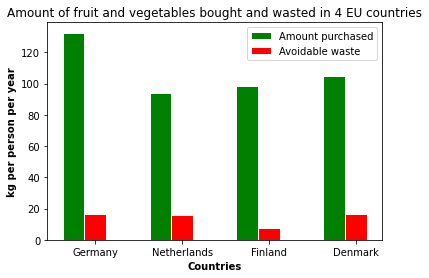

In [2]:
import numpy as np

avoidable_waste = {
    'Germany': [132.5, 16.5], # [purchased, wasted], fruit+vegetables [57.3+75.2, 6.9+9.6]
    'Netherlands': [93.8, 15.9], # fruit+vegetables [57.3+75.2, 6.9+9.6]
    'Finland': [98.2, 7.4], # fruit+vegetables [44.8+53.4, 3+4.4]
    'Denmark': [104.7, 16.6] # fruit+vegetables [47.9+56.8, 5.0+11.6]

}

 
# set width of bars
barWidth = 0.25

# set heights of bars
bars1 = []
bars2 = []
for i in avoidable_waste.values():
    bars1.append(i[0])
    bars2.append(i[1])

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Amount purchased')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='Avoidable waste')

# Add xticks on the middle of the group bars
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('kg per person per year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], avoidable_waste.keys())

# Create legend & Show graphic
plt.legend()
plt.title("Amount of fruit and vegetables bought and wasted in 4 EU countries")
plt.savefig('plots/fruit_vegetables_bought_wasted.png')
plt.show()

# Q: Which fruit generate the least organic waste?
**SA:** Berries and grapes.<br>

**EA:** Given that you consume the edible part, the graph shows how the inedible parts (unavoidable waste) of various fruit compare. But remember that if you choose berries in a plastic box instead of pears without any packaging, it won't be beneficial for the environment.

**S:** https://www.sciencedirect.com/science/article/pii/S0956053X18301946

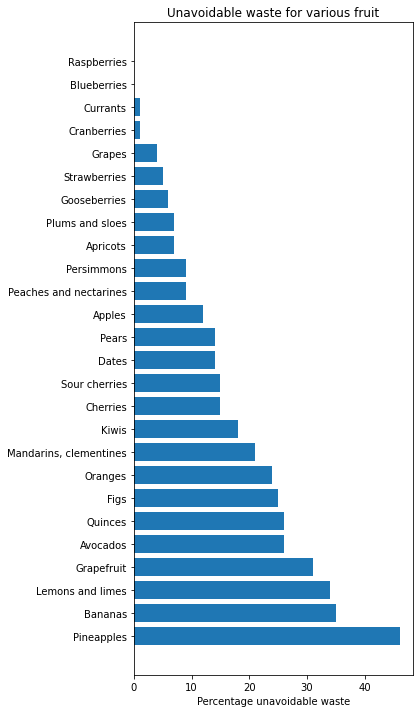

In [3]:
# Unavoidable waste for fruit

#import matplotlib.pyplot as plt

fruit_UWI = {}

# Read the data from tsv
with open("../data/UWI_fruit.tsv") as f:
    for line in f:
        fruit_name, UWI = line.split('\t')
        fruit_UWI[fruit_name] = int(UWI)

# Sort and pack back into a dict
sorted_fruit_UWI = sorted(fruit_UWI.items(), key = lambda kv: kv[1], reverse=True)

sorted_fruit_UWI_dict = {}

for item in sorted_fruit_UWI:
    sorted_fruit_UWI_dict[item[0]] = item[1]
    
#print(sorted_fruit_UWI_dict)


# BAR PLOT
fruit_name = list(sorted_fruit_UWI_dict.keys())
UWI = list(sorted_fruit_UWI_dict.values())
  
fig = plt.figure(figsize = (5, 12))
 
# creating the bar plot
plt.barh(fruit_name, UWI)
 
plt.xlabel("Percentage unavoidable waste")
plt.title("Unavoidable waste for various fruit")
plt.show()

# Q: Which vegetables generate the least organic waste?
**SA:** Tomatoes.<br>

**EA:** Given that you consume the edible part, the graph shows how the inedible parts (unavoidable waste) of various vegetables compare. But remember that if you choose tomatoes in a plastic box instead of onions without any packaging, it won't be beneficial for the environment.

**S:** https://www.sciencedirect.com/science/article/pii/S0956053X18301946

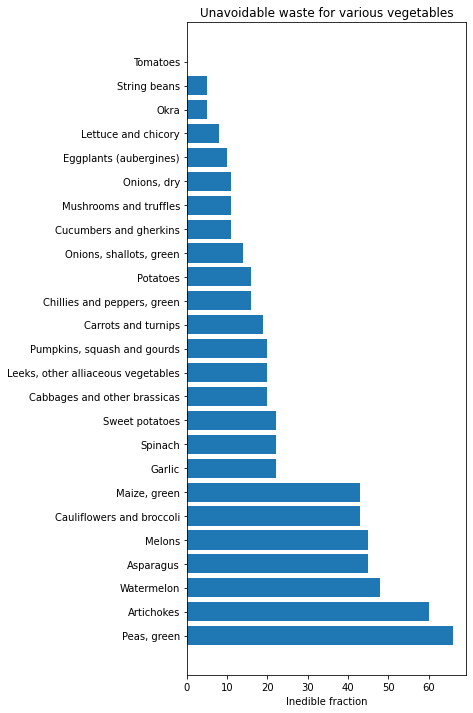

In [4]:
# Unavoidable waste for vegetables

#import matplotlib.pyplot as plt

vegetables_UWI = {}

# Read the data from tsv
with open("../data/UWI_vegetables.tsv") as f:
    for line in f:
        vegetable_name, UWI = line.split('\t')
        vegetables_UWI[vegetable_name] = int(UWI)

# Sort and pack back into a dict
sorted_vegetables_UWI = sorted(vegetables_UWI.items(), key = lambda kv: kv[1], reverse=True)

sorted_vegetables_UWI_dict = {}

for item in sorted_vegetables_UWI:
    sorted_vegetables_UWI_dict[item[0]] = item[1]
    
#print(sorted_vegetables_UWI_dict)


# BAR PLOT
vegetable_name = list(sorted_vegetables_UWI_dict.keys())
UWI = list(sorted_vegetables_UWI_dict.values())
  
fig = plt.figure(figsize = (5,12))
 
# creating the bar plot
plt.barh(vegetable_name, UWI)
 
plt.xlabel("Inedible fraction")
plt.title("Unavoidable waste for various vegetables")
plt.show()

# **Q:** Fresh or frozen berries?
**SA:** Fresh if in season. Environmental impact of out-of-season strawberries is seven times higher than of seasonal ones. Frozen berries are better for the environment than fresh but out-of-season ones, also because they help reduce food waste.<br>
**EA:** As usual, the answer is complex, as a lot depends on the distance travelled, means of transportation, packaging, type of greenhouse and fertilisers etc. The footprint of berries grown locally in hothouses is comparable to the footprint of these flown from warm countries. In the Netherlands, for example, hothouses are subsidized by the government, and finding berries grown outside can be challenging even in season. It often costs more energy to grow berries in Dutch hothouses than to bring them from abroad by truck or boat, and thus here Polish or Spanish strawberries can have a lower environmental impact than the local ones from greenhouses.
Frozen berries are the second best option after local seasonal ones. They are usually frozen in peak season directly after harvest and thus contain all the nutrients and vitamins. The CO2e emissions caused by their packaging are negligible taken into account the reduction in food waste. This is also true for fresh berries: better packed than wasted. Small (c. 250g) packages of berries in plastic containers are still better to be avoided. Buying unpacked berries is good for the environment if you eat them all and do not throw away these damaged in transportation.
To sum up, a general advice is to choose unpacked berries grown locally when they are in season. It is not only good for the environment, but also tasty and healthy!<br>
**S:**<br>
https://www.milieucentraal.nl/eten-en-drinken/milieubewust-eten/groente-en-fruit/<br>
https://books.google.com.ar/books?id=Pym9DwAAQBAJ

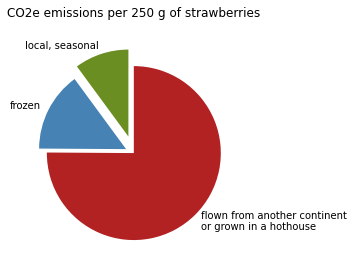

In [5]:
# kg CO2e per 250 g strawberries
berries_emissions = {
    'local, seasonal': 0.49,
    'frozen': 0.72,
    'flown from another continent\nor grown in a hothouse': 3.65
}

colors = ['olivedrab', 'steelblue', 'firebrick']

fig, ax = plt.subplots()

ax.pie(berries_emissions.values(), explode = [0.2, 0.1, 0], labels = berries_emissions.keys(), colors = colors, startangle = 90)
ax.set_title('CO2e emissions per 250 g of strawberries', y = 1.1)

plt.show()

# Q: What can I do to reduce the amount of organic waste?
**SA:** Consider meal planning and other strategies listed below.<br>

**EA:**<br>
1. Consider meal planning and writing shopping lists not only with the names of the foods, but also with exact amounts (at least for some of them). If you plan ahead, you'll reduce the time spent roaming the supermarket, eliminate the torture of deciding what to cook at every single meal and save the foods from rotting in your fridge. <br>
2. If you love spending time cooking according to a recipe, but hate inventing meals and going to the supermarket, try HelloFresh and the like. This study (https://www.sciencedirect.com/science/article/abs/pii/S0921344919301703) claims that meal kits help to reduce waste and overall environmental impact, despite all the packaging. <br>
3. Freeze or give away good fresh food that you know you won't eat in time. Some foods are ruined by freezing, but others don't seem to be much influenced. And there are always people around who could use a free meal.<br>
4. If you tend to throw away a particular kind of food regularly, try buying less of it and/or consuming it on the day of the shopping.<br>

**S:** https://www.sciencedirect.com/science/article/pii/S0956053X18301946

# Q: Should I compost organic waste?
**SA:** Yes, definitely. If you have compost bins close to your home, please use them. 


**EA:** It's even possible to compost in your own backyard: https://www.pca.state.mn.us/waste/composting-your-backyard. The more waste is composted - the less ends up in landfills and incinerators, which is a huge benefit for the environment.

# Q: Are meal kits good for the environment?
**SA:** Mostly yes. 

**EA:** If you love spending time cooking according to a recipe, but hate inventing meals and going to the supermarket, try HelloFresh and the like. This study (https://www.sciencedirect.com/science/article/abs/pii/S0921344919301703) claims that meal kits help to reduce waste and overall environmental impact, despite all the packaging.

# Q: Should I buy almost-expired items with discounts in supermarkets?
**SA:** Only if you're sure you'll consume this food before the expiry date. 

**EA:** Possible scenario 1: buy two very ripe bananas to eat them today, plus several less ripe for the remaining few days before the next shopping trip. Possible scenario 2: buy one yoghurt that expires tomorrow and two that are good for the rest of the week. Acting in such way you save the food that otherwise would be thrown away, together with all the sources spent for producing and transporting them.